In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backport

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

2023-06-03 10:00:07.804572: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-03 10:00:07.926241: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-03 10:00:08.559597: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
os.path.join('data', 'happy')

'data/happy'

In [3]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

2023-06-03 10:00:13.702557: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-03 10:00:13.726492: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
len(gpus)

1

In [5]:
#Avoid OOM errors by setting GPU Memory Consumrtion Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

In [7]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

## 1.2 Remove dodgy images

In [9]:
# Define the path to the data directory
data_dir = '/home/mitraa/Jupyter Notebook/Emotion Detection CNN/datas'

In [10]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    subset='training')

val_datagen = ImageDataGenerator()

val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    subset='validation')

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    subset='validation')

Found 304 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [11]:
# Print the list of files in the 'happy' subdirectory of the data directory
os.listdir(os.path.join(data_dir, 'happy'))

['60632274._UY200_.jpg',
 'images28.jpg',
 '8cxKy5g9i.jpg',
 'smile.woman_.jpg',
 'images36.jpg',
 'image4.jpeg',
 'image26.jpeg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 'images10.jpg',
 'images34.jpg',
 'getty_505175324_2000131020009280246_158016.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 '1902587.jpg',
 'images9.jpg',
 'image.jpeg',
 'HappyPeopleBanner.png',
 'images17.jpg',
 'images27.jpg',
 'image9.jpeg',
 'o-HAPPY-facebook.jpg',
 'jumping_for_joy_for_3_kinds_of_happy_people.jpg',
 'getty_494581822_130796.jpg',
 'happypeople-1024x679.jpg',
 'image13.jpeg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'image18.jpeg',
 'happy-people-vector-29209040.jpg',
 'happy-people-1024x768.jpeg',
 'GettyImages-871518740-1024x707.jpg',
 'happy-people21.jpg',
 'A_Sep20_14_1189155141.jpg',
 'images.jpg',
 'image27.jpeg',
 'friends-happy-190821-800x450.jpg',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 'happy-person.jpeg',
 'bigstock-Portrait-Of-Smili

In [12]:
# Define a list of valid image file extensions
image_exts = ['jpeg','jpg','bmp','png']

In [13]:
# Loop over each directory in the data directory
for image_class in os.listdir(data_dir):
    # Loop over each file in the current directory
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

60632274._UY200_.jpg
images28.jpg
8cxKy5g9i.jpg
smile.woman_.jpg
images36.jpg
image4.jpeg
image26.jpeg
1HEoLBLidT2u4mhJ0oiDgig.png
images10.jpg
images34.jpg
getty_505175324_2000131020009280246_158016.jpg
goup-happy-people-group-jumping-isolated-white-background-35582232.jpg
1902587.jpg
images9.jpg
image.jpeg
HappyPeopleBanner.png
images17.jpg
images27.jpg
image9.jpeg
o-HAPPY-facebook.jpg
jumping_for_joy_for_3_kinds_of_happy_people.jpg
getty_494581822_130796.jpg
happypeople-1024x679.jpg
image13.jpeg
e162ccda8ce0f197f8863f327add9233.jpg
image18.jpeg
happy-people-vector-29209040.jpg
happy-people-1024x768.jpeg
GettyImages-871518740-1024x707.jpg
happy-people21.jpg
A_Sep20_14_1189155141.jpg
images.jpg
image27.jpeg
friends-happy-190821-800x450.jpg
227-2271622_happy-people-business-team-celebrating-png.png
happy-person.jpeg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
image29.jpeg
Screen-Shot-2012-10-23-at-12.57.22-PM.png
_happy_jumping_on_beach-40815.jpg
image22.jpeg
images

In [14]:
# Load an example image and display its shape and content
img = cv2.imread(os.path.join('datas','happy','05-12-21-happy-people.jpg'))
img.shape

(880, 1400, 3)

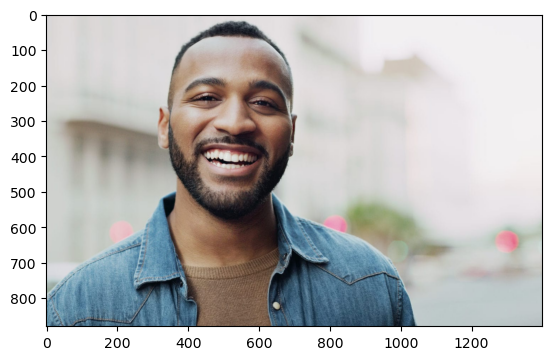

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
# Loop over each directory in the data directory
for image_class in os.listdir(data_dir):
    # Loop over each file in the current directory
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # Construct the full path to the current image
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Read the image data and determine its file type using the imghdr module
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            # If the file type is not one of the valid image extensions, delete the file
            if tip not in image_exts:
                print('Image not in exts list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            # If an error occurs while processing the image, delete the file
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

## 1.3 Load Data

In [15]:
tf.data.Dataset??

In [24]:
tf.keras.utils.image_dataset_from_directory??

In [18]:
# Load the image data into a TensorFlow dataset object
data = tf.keras.utils.image_dataset_from_directory('datas')

Found 304 files belonging to 2 classes.


In [19]:
# Get an iterator over the dataset
data_iterator = data.as_numpy_iterator()
data_iterator

2023-06-03 10:01:03.831440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [304]
	 [[{{node Placeholder/_0}}]]
2023-06-03 10:01:03.831798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [304]
	 [[{{node Placeholder/_0}}]]


In [20]:
# Get another batch from the itterator
# Get the first batch of images and their corresponding labels
batch = data_iterator.next()
batch

(array([[[[3.10000000e+01, 4.30000000e+01, 5.70000000e+01],
          [3.12871094e+01, 4.32871094e+01, 5.78613281e+01],
          [3.15214844e+01, 4.40000000e+01, 6.00000000e+01],
          ...,
          [3.00000000e+01, 3.90000000e+01, 4.40000000e+01],
          [3.00000000e+01, 3.90000000e+01, 4.40000000e+01],
          [3.18085938e+01, 4.08085938e+01, 4.58085938e+01]],
 
         [[3.10446739e+01, 4.30446739e+01, 5.70446739e+01],
          [3.16198845e+01, 4.36198845e+01, 5.81941032e+01],
          [3.15214844e+01, 4.40000000e+01, 6.00000000e+01],
          ...,
          [6.12753906e+01, 7.02753906e+01, 7.52753906e+01],
          [6.12753906e+01, 7.02753906e+01, 7.52753906e+01],
          [6.30839844e+01, 7.20839844e+01, 7.70839844e+01]],
 
         [[3.11963768e+01, 4.31963768e+01, 5.71963768e+01],
          [3.20000000e+01, 4.40000000e+01, 5.85742188e+01],
          [3.15747566e+01, 4.40532722e+01, 6.00532722e+01],
          ...,
          [1.08912109e+02, 1.17912109e+02, 1.2291

In [21]:
# Images represented as numpy arrays:
# Print the shape of the images in the batch
batch[0].shape

(32, 256, 256, 3)

In [22]:
# Class 1 = SAD PPL
# Class 0 = HAPPY PPL
# Print the labels of the images in the batch
batch[1]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int32)

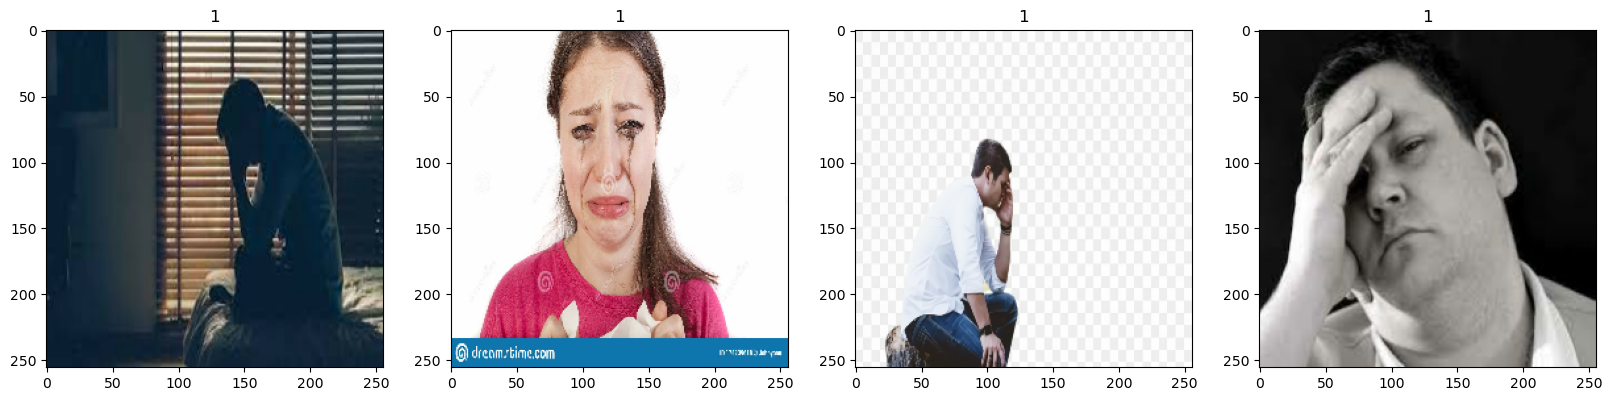

In [23]:
# Display the first four images in the batch along with their labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [24]:
# Scale the pixel values of the images to be between 0 and 1
scaled = batch[0] / 255
scaled.min()

0.0

In [25]:
# Print the minimum and maximum pixel values of the scaled images
scaled.max()

1.0

# 2. Preprocess Data


## 2.1 Scale Data

In [26]:
# Apply the scaling function to the entire dataset using the map() method
data = data.map(lambda x,y: (x/255,y))

In [27]:
data.as_numpy_iterator().next()

2023-06-03 10:01:23.774183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [304]
	 [[{{node Placeholder/_4}}]]
2023-06-03 10:01:23.774834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [304]
	 [[{{node Placeholder/_0}}]]


(array([[[[0.54901963, 0.6509804 , 0.7490196 ],
          [0.54901963, 0.6509804 , 0.7490196 ],
          [0.54901963, 0.6509804 , 0.7490196 ],
          ...,
          [0.43206188, 0.26868874, 0.16078432],
          [0.49977022, 0.29193473, 0.16078432],
          [0.53231466, 0.32054994, 0.17966452]],
 
         [[0.54901963, 0.6509804 , 0.7490196 ],
          [0.54901963, 0.6509804 , 0.7490196 ],
          [0.54901963, 0.6509804 , 0.7490196 ],
          ...,
          [0.42674074, 0.26336756, 0.15546316],
          [0.4932875 , 0.28545204, 0.15430161],
          [0.527743  , 0.3159783 , 0.17509289]],
 
         [[0.5501455 , 0.6521063 , 0.75014555],
          [0.5501455 , 0.6521063 , 0.75014555],
          [0.5501455 , 0.6521063 , 0.75014555],
          ...,
          [0.4189679 , 0.25559473, 0.14769033],
          [0.48506433, 0.27722886, 0.14607844],
          [0.5198641 , 0.30809936, 0.16721396]],
 
         ...,
 
         [[0.27003744, 0.2534745 , 0.2528924 ],
          [0.2693 

In [28]:
# Get an iterator over the scaled dataset
scaled_iterator = data.as_numpy_iterator()

In [29]:
# Get the first batch of images and their corresponding labels from the scaled dataset
batch = scaled_iterator.next()

In [30]:
# Print the maximum pixel value of the images in the batch
batch[0].max()

1.0

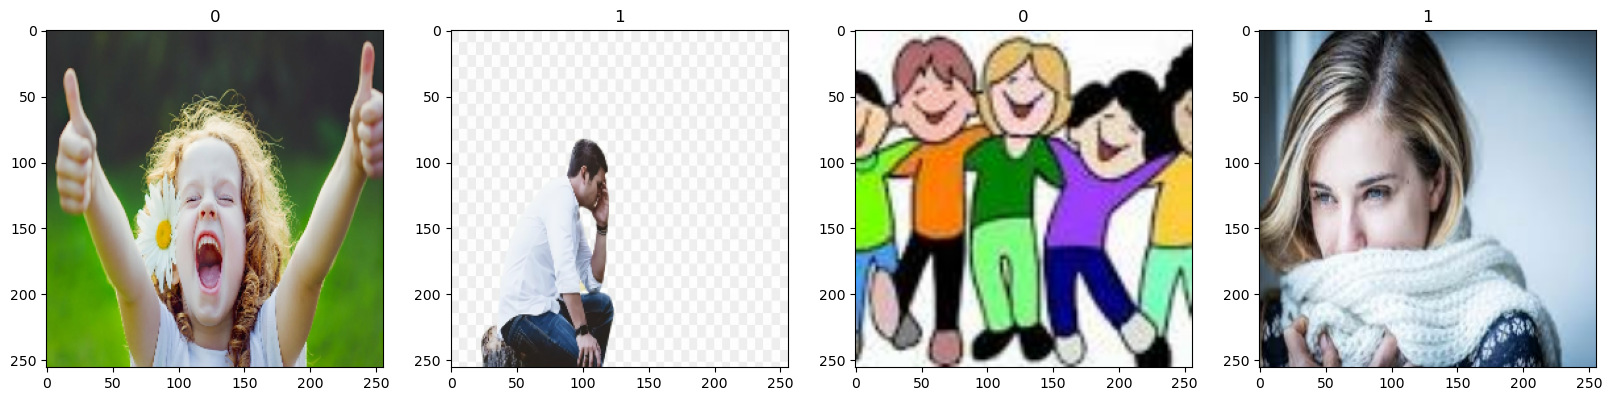

In [31]:
# Display the first four images in the batch from the scaled dataset
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data

In [32]:
len(data)

10

In [33]:
# Calculate the sizes of the training, validation, and testing sets
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [34]:
train_size

7

In [35]:
train_size + test_size + val_size

10

In [36]:
# Split the dataset into training, validation, and testing sets using the take() and skip() methods
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [37]:
len(train)

7

# 3 Deep Model

## 3.1 Build Deep Learning Model

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 3.2 Train

In [43]:
logdir = 'logs'

In [44]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [45]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-06-03 10:02:04.442755: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [304]
	 [[{{node Placeholder/_4}}]]
2023-06-03 10:02:04.442947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [304]
	 [[{{node Placeholder/_4}}]]


7/7 [==============================] - ETA: 0s - loss: 1.0245 - accuracy: 0.5491

2023-06-03 10:02:06.453347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [304]
	 [[{{node Placeholder/_4}}]]
2023-06-03 10:02:06.453560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [304]
	 [[{{node Placeholder/_4}}]]


7/7 [==============================] - 3s 278ms/step - loss: 1.0245 - accuracy: 0.5491 - val_loss: 0.6645 - val_accuracy: 0.7656
Epoch 2/20
7/7 [==============================] - 2s 278ms/step - loss: 0.6508 - accuracy: 0.6339 - val_loss: 0.5399 - val_accuracy: 0.7969
Epoch 3/20
7/7 [==============================] - 2s 279ms/step - loss: 0.5699 - accuracy: 0.7143 - val_loss: 0.4089 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 2s 278ms/step - loss: 0.6069 - accuracy: 0.7188 - val_loss: 0.4932 - val_accuracy: 0.8594
Epoch 5/20
7/7 [==============================] - 2s 279ms/step - loss: 0.5610 - accuracy: 0.7366 - val_loss: 0.5448 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 2s 276ms/step - loss: 0.4516 - accuracy: 0.8482 - val_loss: 0.3137 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 2s 277ms/step - loss: 0.3800 - accuracy: 0.8438 - val_loss: 0.3272 - val_accuracy: 0.8906
Epoch 8/20
7/7 [===============

In [46]:
history = model.fit(train,
                    validation_data=val,
                    epochs=20,
                    callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 2s 278ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 2/20
7/7 [==============================] - 2s 279ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 3/20
7/7 [==============================] - 2s 286ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 2s 279ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 2s 278ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 2s 280ms/step - loss: 9.7321e-04 - accuracy: 1.0000 - val_loss: 9.9576e-04 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 2s 281ms/step - loss: 7.3252e-04 - accuracy: 1.0000 - val_loss: 8.1066e-04 - val_accuracy: 1.0000
Epoc

In [47]:
hist.history

{'loss': [1.0245320796966553,
  0.650765597820282,
  0.5698508620262146,
  0.6068660616874695,
  0.5609804391860962,
  0.45164352655410767,
  0.3800347149372101,
  0.29956579208374023,
  0.2319316565990448,
  0.17628934979438782,
  0.14866803586483002,
  0.1434657871723175,
  0.0745081976056099,
  0.05145956948399544,
  0.02022397890686989,
  0.014648489654064178,
  0.016326650977134705,
  0.010615972802042961,
  0.005125456489622593,
  0.0037864812184125185],
 'accuracy': [0.5491071343421936,
  0.6339285969734192,
  0.7142857313156128,
  0.71875,
  0.7366071343421936,
  0.8482142686843872,
  0.84375,
  0.9017857313156128,
  0.9464285969734192,
  0.9419642686843872,
  0.9598214030265808,
  0.9821428656578064,
  0.9955357313156128,
  0.9821428656578064,
  0.9910714030265808,
  1.0,
  1.0,
  0.9955357313156128,
  1.0,
  1.0],
 'val_loss': [0.664515495300293,
  0.5398737192153931,
  0.4089062213897705,
  0.49323490262031555,
  0.5447750091552734,
  0.3137061297893524,
  0.3271916806697845

## 3.3 Plot Performance

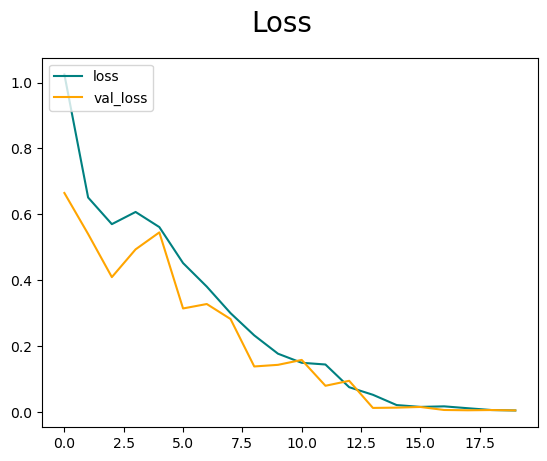

In [48]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

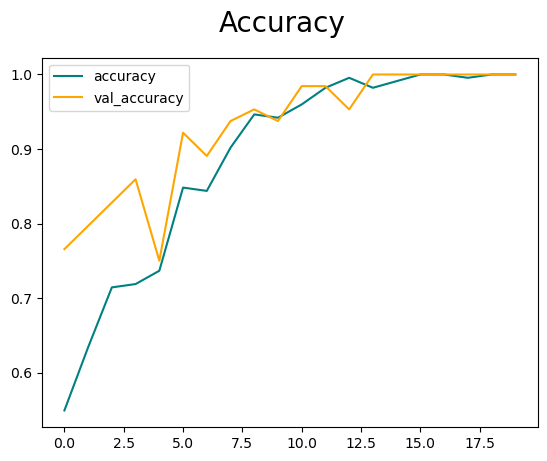

In [49]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

## 4.1 Evaluate 

In [51]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [52]:
len(test)

1

In [53]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-06-03 10:04:08.956861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [304]
	 [[{{node Placeholder/_4}}]]
2023-06-03 10:04:08.957107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [304]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 86ms/step


In [54]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


## 4.2 Test

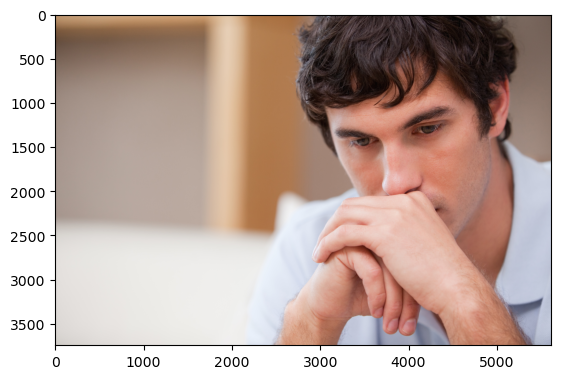

In [67]:
img = cv2.imread('sad test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

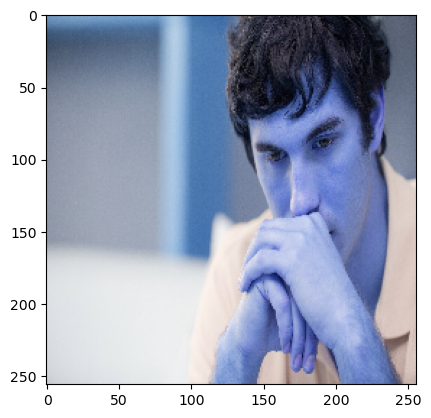

In [68]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [69]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 13ms/step


In [70]:
yhat

array([[0.9999372]], dtype=float32)

In [71]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 5. Save the Model

## 5.1 Save the Model

In [75]:
model.save(os.path.join('models', 'emotiondetectionmodel.h5'))

In [77]:
new_model = load_model(os.path.join('models','emotiondetectionmodel.h5'))

In [78]:
new_model

In [79]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 199ms/step


In [80]:
if yhatnew > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
